# COVID-19 Argentina por RJC

In [101]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [102]:
f = 'Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f)    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
52,4/26/2020,112,7,"1,107","49,905"
53,4/27/2020,111,5,"1,140","51,900"
54,4/28/2020,124,10,"1,162","53,600"
55,4/29/2020,158,7,"1,192","56,058"
56,4/30/2020,143,4,"1,256","58,685"
57,5/1/2020,104,11,"1,292","61,530"
58,5/2/2020,149,8,"1,320","63,866"
59,5/3/2020,102,9,"1,354","65,813"
60,5/4/2020,104,14,"1,442","67,920"
61,5/5/2020,134,4,"1,472","69,718"


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [103]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2020-04-26,112,7,"1,107","49,905"
2020-04-27,111,5,"1,140","51,900"
2020-04-28,124,10,"1,162","53,600"
2020-04-29,158,7,"1,192","56,058"
2020-04-30,143,4,"1,256","58,685"
2020-05-01,104,11,"1,292","61,530"
2020-05-02,149,8,"1,320","63,866"
2020-05-03,102,9,"1,354","65,813"
2020-05-04,104,14,"1,442","67,920"


### Calculo la tasa diaria de recuperados, activos y tests

In [104]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2020-04-26,112,7,"1,107","49,905",77,"2,499",28
2020-04-27,111,5,"1,140","51,900",33,"1,995",73
2020-04-28,124,10,"1,162","53,600",22,"1,700",92
2020-04-29,158,7,"1,192","56,058",30,"2,458",121
2020-04-30,143,4,"1,256","58,685",64,"2,627",75
2020-05-01,104,11,"1,292","61,530",36,"2,845",57
2020-05-02,149,8,"1,320","63,866",28,"2,336",113
2020-05-03,102,9,"1,354","65,813",34,"1,947",59
2020-05-04,104,14,"1,442","67,920",88,"2,107",2


### Calculo el total de contagios, muertos y activos

In [105]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2020-04-26,112,7,"1,107","49,905",77,"2,499",28,3892,192,"2,593"
2020-04-27,111,5,"1,140","51,900",33,"1,995",73,4003,197,"2,666"
2020-04-28,124,10,"1,162","53,600",22,"1,700",92,4127,207,"2,758"
2020-04-29,158,7,"1,192","56,058",30,"2,458",121,4285,214,"2,879"
2020-04-30,143,4,"1,256","58,685",64,"2,627",75,4428,218,"2,954"
2020-05-01,104,11,"1,292","61,530",36,"2,845",57,4532,229,"3,011"
2020-05-02,149,8,"1,320","63,866",28,"2,336",113,4681,237,"3,124"
2020-05-03,102,9,"1,354","65,813",34,"1,947",59,4783,246,"3,183"
2020-05-04,104,14,"1,442","67,920",88,"2,107",2,4887,260,"3,185"


### Grafico de tasa diaria

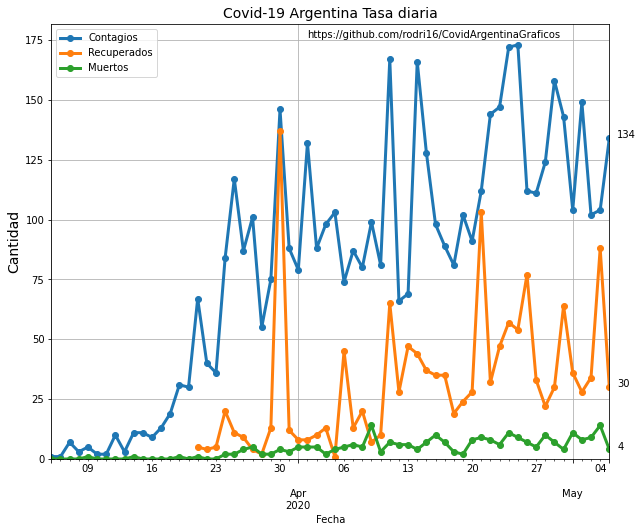

In [106]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)
ax.text('2020-4-2',176,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
for var in (df.Contagios,df.Recuperados,df.Muertos):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0)


#Salvo el grafico con la ultima fecha
name='Graficos/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

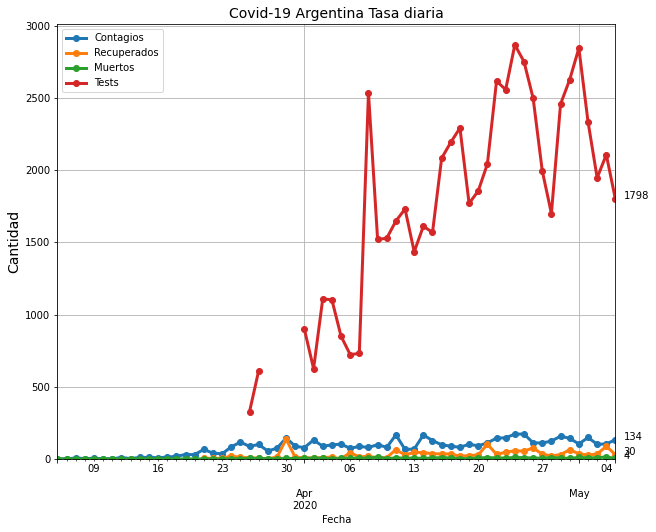

In [107]:
#agrego los tests pero no se ve nada (mejor en logaritmico)
ax=df.plot(y=['Contagios','Recuperados','Muertos','Tests_diario'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos","Tests"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios,df.Recuperados,df.Muertos,df.Tests_diario):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/TasaDiariaFullLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de barras de las tasas diarias (solo otra manera de verlo)

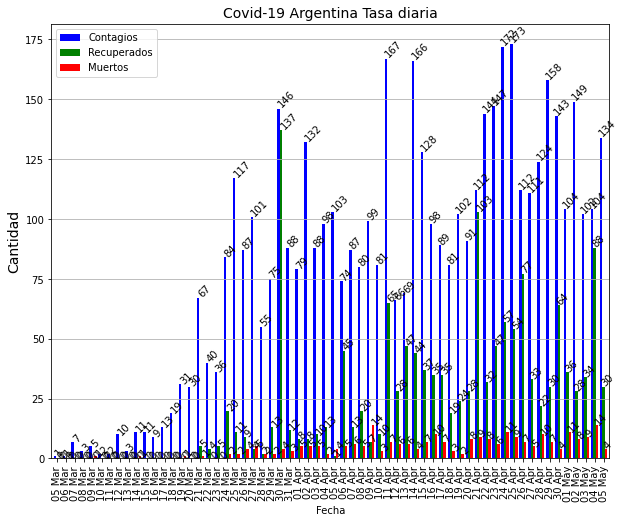

In [108]:
ax=df.plot.bar(y=['Contagios','Recuperados','Muertos'],color=['blue','green','red'],width=0.8, legend='true',figsize=(10,8))
#arreglo el formato de la fecha
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))#arregla la fecha
#agrego grid
plt.grid(axis='y')
plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005),rotation=45)

    #salvo grafico
name='Graficos/TasaDiariaBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico total contagios y Activos

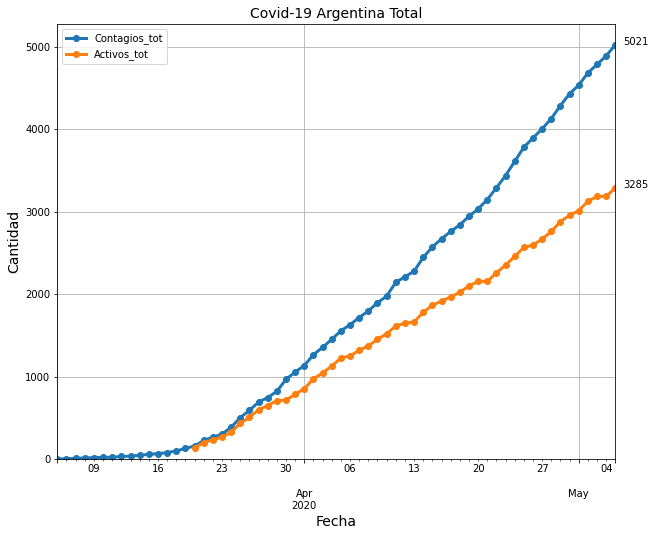

In [109]:
ax=df.plot(y=['Contagios_tot','Activos_tot'], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios_tot,df.Activos_tot):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Agrego total Muertos

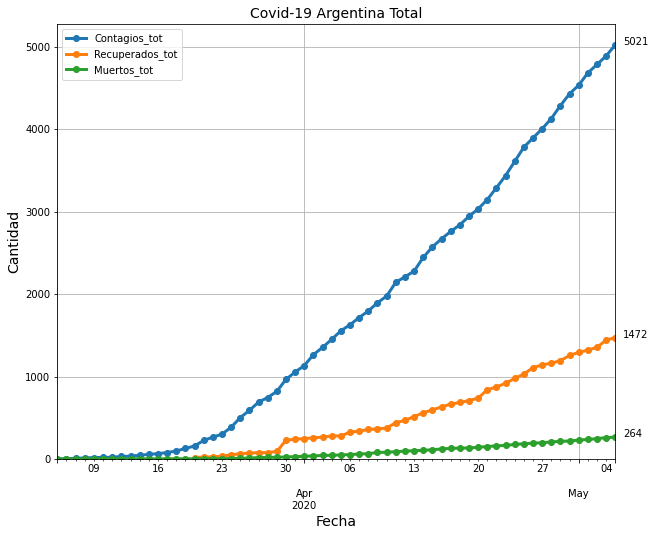

In [110]:
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot'], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(loc='upper left');
#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#agrega ultimo numero
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico Totales (el mas completo!!)

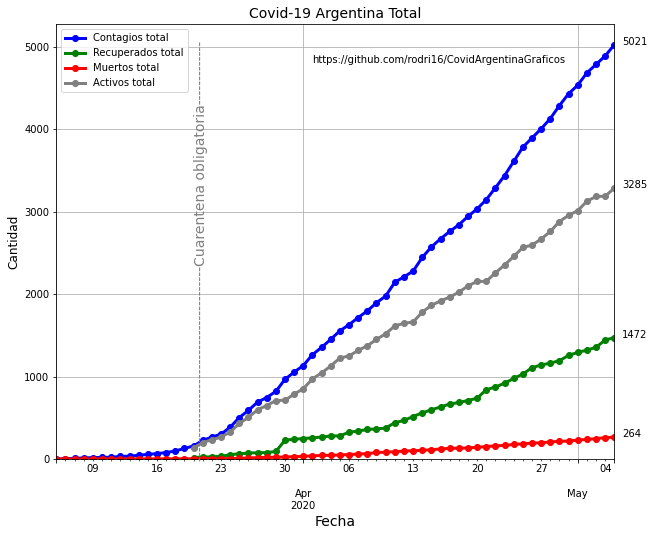

In [111]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
ax.text('2020-4-2',4800,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

# Add labels to the plot
style = dict(size=14, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "----------------------------------------Cuarentena obligatoria-------------",rotation=90, **style)

#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

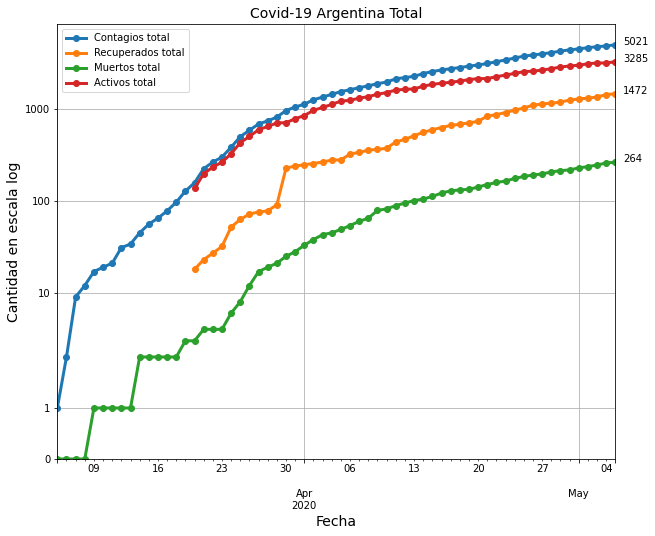

In [112]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Agrego los test en escala logaritmica, aca se pueden ver todos los datos juntos gracias a la escala log

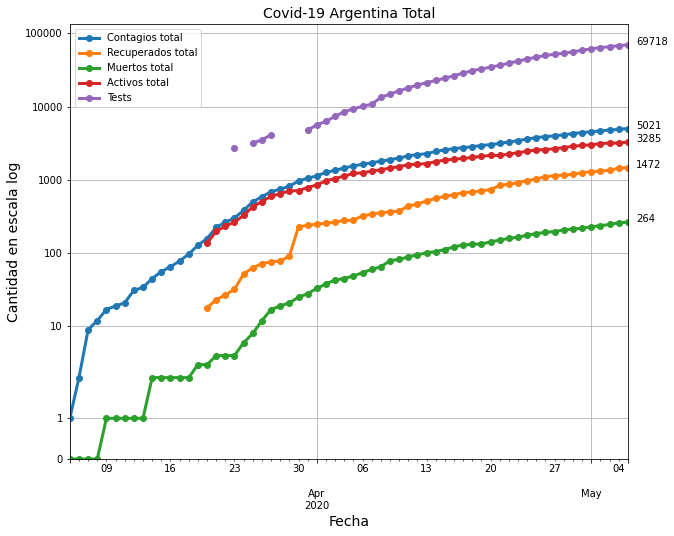

In [113]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Asi sin escala log, se ve la diferencia!!

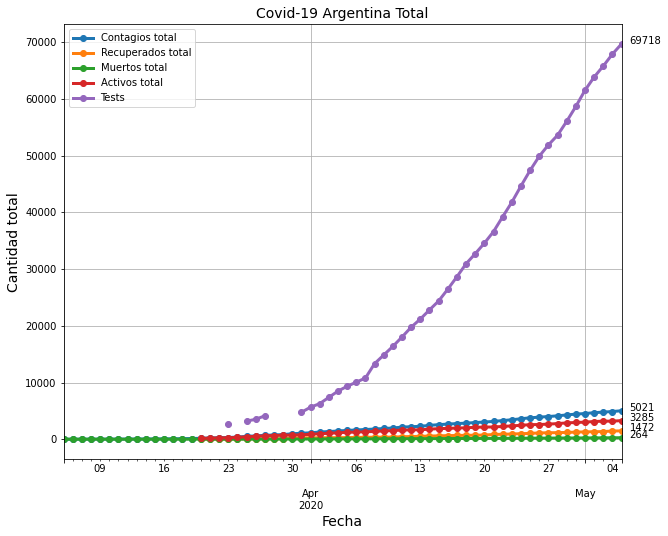

In [114]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad total', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


### Grafico de barras del total de contagios y activos

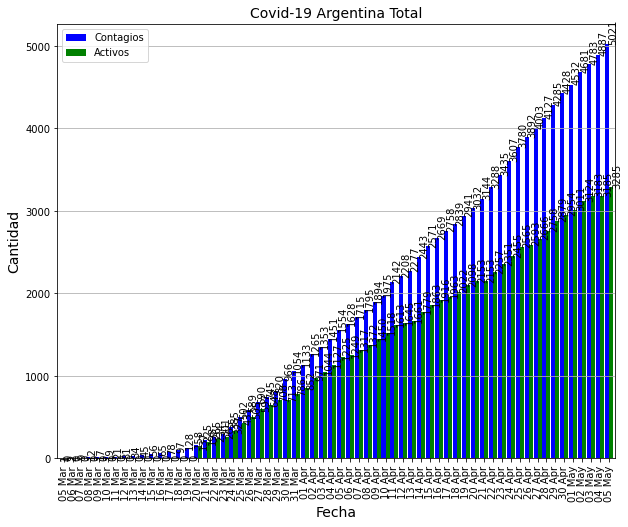

In [115]:
ax=df.plot.bar(y=['Contagios_tot','Activos_tot'],color=['blue','green'],figsize=(10,8),width=0.9)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))

plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(['Contagios', "Activos"],loc='upper left');
plt.grid(axis='y')

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)

name='Graficos/Contagios_totBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Subplots

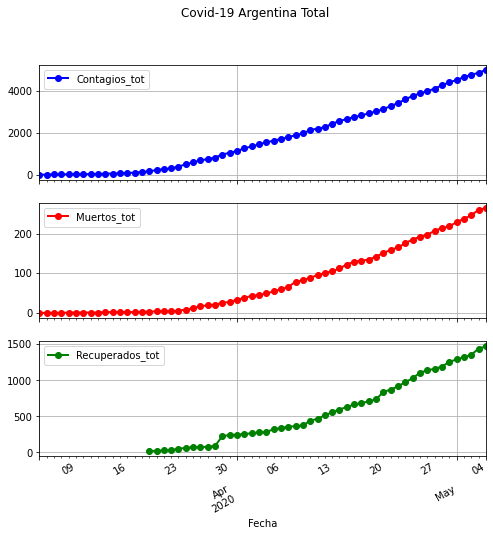

In [116]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot'],color=['blue','red','green'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Contagios_tot100_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

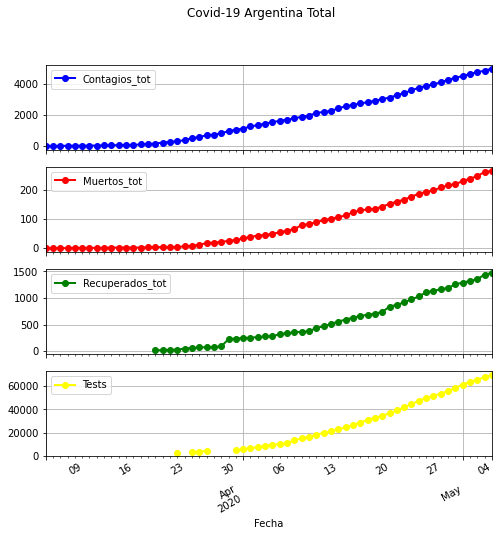

In [117]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico en escala log

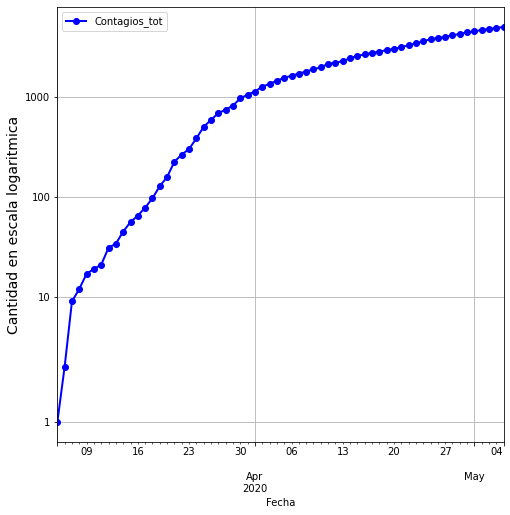

In [118]:
ax=df.plot(y=['Contagios_tot'],color=['blue'],figsize=(8,8),style='.-',grid='on',linewidth=2,logy="sym", marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad en escala logaritmica', fontsize=14)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

name='Graficos/Contagios_tot_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

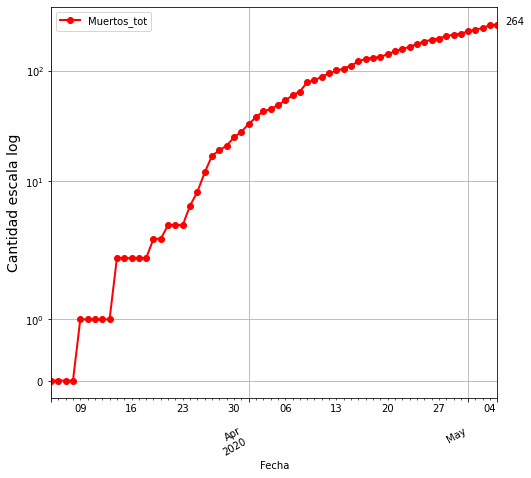

In [119]:
ax=df.plot(y=['Muertos_tot'],color=['red'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad escala log', fontsize=14)
plt.annotate('%d' % df.Muertos_tot.max(), xy=(1, df.Muertos_tot.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Muertos_tot10_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

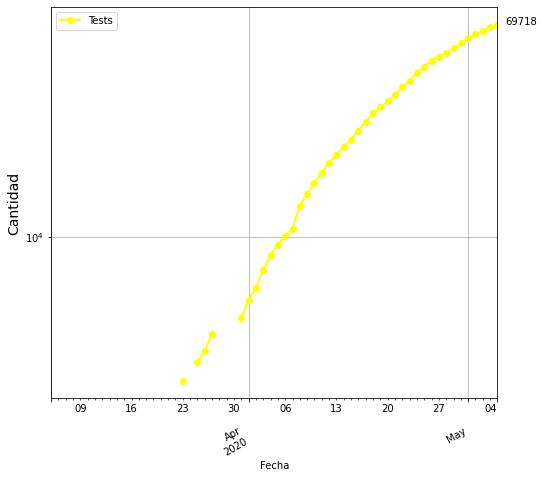

In [120]:
ax=df.plot(y=['Tests'],color=['yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad', fontsize=14)
plt.annotate('%d' % df.Tests.max(), xy=(1, df.Tests.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Test_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Como quedo la tabla

In [121]:
df.describe()

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
count,62,62,47,40,46,37,46,62,62,47
mean,81,4,584,"29,725",32,"1,781",68,"1,788",80,"1,655"
std,52,4,453,"21,542",28,704,32,"1,621",84,944
min,1,0,18,"2,695",1,328,0,1,0,137
25%,32,1,244,"9,881",10,"1,435",54,175,3,819
50%,88,4,468,"25,416",28,"1,798",70,"1,502",47,"1,645"
75%,112,7,948,"48,031",42,"2,336",94,"3,009",140,"2,403"
max,173,14,"1,472","69,718",137,"2,868",121,"5,021",264,"3,285"


## Meto todos los datos de la tabla en un archivo .csv  con la fecha

In [122]:
name='csv _datos_completos/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

### Probando interpolaciones...

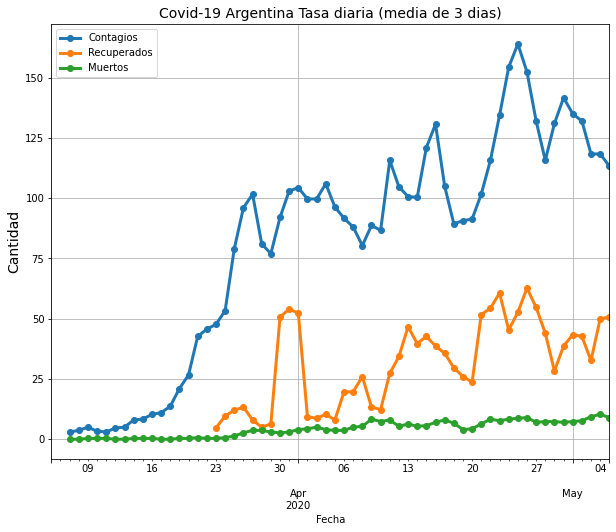

In [123]:
import numpy as np
N=3
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Tasa diaria (media de 3 dias)',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

name='Graficos/TasaDiariaMA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

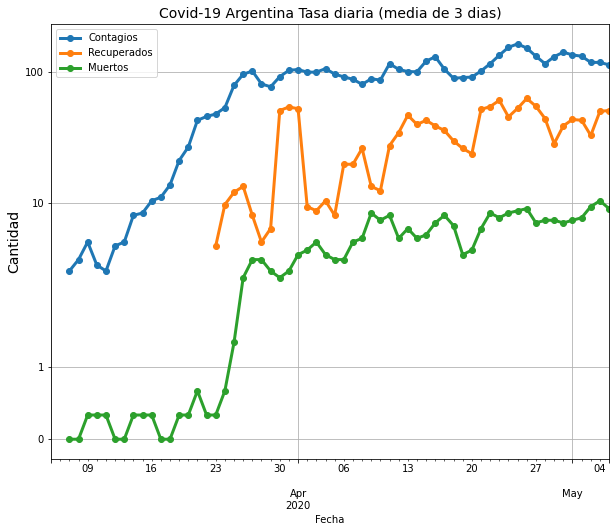

In [124]:
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'], legend='true',style='-',grid='on',logy='sym',figsize=(10,8),linewidth=3, marker='o')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.title('Covid-19 Argentina Tasa diaria (media de 3 dias)',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)
name='Graficos/TasaDiariaMA_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

## Animation TODO

In [125]:
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)
'''

'\nimport numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib\nimport matplotlib.pyplot as plt\nimport matplotlib.animation as animation\noverdoses = pd.read_excel(\'overdose_data_1999-2015.xls\',sheetname=\'Online\',skiprows =6)\ndef get_data(table,rownum,title):\n    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)\n    data.columns = {title}\n    return data\n\n%matplotlib notebook\ntitle = \'Heroin Overdoses\'\nd = get_data(overdoses,18,title)\nx = np.array(d.index)\ny = np.array(d[\'Heroin Overdoses\'])\noverdose = pd.DataFrame(y,x)\n#XN,YN = augment(x,y,10)\n#augmented = pd.DataFrame(YN,XN)\noverdose.columns = {title}\n\nWriter = animation.writers[\'ffmpeg\']\nwriter = Writer(fps=20, metadata=dict(artist=\'Me\'), bitrate=1800)\nfig = plt.figure(figsize=(10,6))\nplt.xlim(1999, 2016)\nplt.ylim(np.min(overdose)[0], np.max(overdose)[0])\nplt.xlabel(\'Year\',fontsize=20)\nplt.ylabel(title,fontsize=20)\nplt.title(\'Heroin Overdoses per Year\',fontsize=20)

In [126]:
'''
import pygsheets
gc = pygsheets.authorize(service_file='file.json')

#open the google spreadsheet 
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vMXik99Jwm5tIos-cgYAj7iyYerZouP5NsHxgVCN2U4')

#select the first sheet 
wks = sh[1]

#update the first sheet with df, starting at cell B2. 
wks.set_dataframe(df)
'''

"\nimport pygsheets\ngc = pygsheets.authorize(service_file='file.json')\n\n#open the google spreadsheet \nsh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vMXik99Jwm5tIos-cgYAj7iyYerZouP5NsHxgVCN2U4')\n\n#select the first sheet \nwks = sh[1]\n\n#update the first sheet with df, starting at cell B2. \nwks.set_dataframe(df)\n"

In [127]:
df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA
Fecha,,,,,,,,,,,,,
2020-05-01,104,11,"1,292","61,530",36,"2,845",57,4532,229,"3,011",135,43,7
2020-05-02,149,8,"1,320","63,866",28,"2,336",113,4681,237,"3,124",132,43,8
2020-05-03,102,9,"1,354","65,813",34,"1,947",59,4783,246,"3,183",118,33,9
2020-05-04,104,14,"1,442","67,920",88,"2,107",2,4887,260,"3,185",118,50,10
2020-05-05,134,4,"1,472","69,718",30,"1,798",100,5021,264,"3,285",113,51,9
